# Procesamiento de señales
## Tarea 4
### Javier Peralta


## Señales Armónicas Relacionadas entre si

$ \forall continuo \quad S_k(t) = e^{i\Omega k t} = e^{i2\pi F_0 kt} \quad k = 0, \pm 1, \pm 2, \pm 3 ...$

La frecuencia fundamental de cada una de ellas es $F_0 k$ y periodo $T_k = \frac{1}/{F_0 k}$

Todas ellas comparten un periodo en común $T_p = \frac{1}{f_o}$ y peridod $T_k = \frac{1}{F_0k}$

$$g(t) = \sum_{k=-\infty}^{\infty} C_k e^{i\Omega k f} \quad C \in \mathbb{C}$$

La señal $g(t)$ es periódica con periodo $T_p$

Caso discreto : $S_k(n) = e^{iwkn} = e^{i2\pi kf_0 n} \quad k = 0, \pm 1, \pm 2, \pm 3 ...$

Las señales son periódicas sólo si su frecuancia es racional. Elegimos $f_0 = \frac{1}{N}$ para relacionarlas a toas ellas con esta frecuencia. El periodo es N

**Observación**: $S{k+N}(n) =  e^{i2\pi (k + N)f_0 n} =  e^{i2\pi k f_0 n}   e^{i2\pi N f_0 n} =  e^{i2\pi kf_0 n}  e^{i2\pi n} = S(k)$

Entonces sólo tenemos N señales distintas.


$$g(n) = \sum_{k=0}^{N-1} C_kS_k(n) = \sum_{k=0}^{N-1}C_k e^{\frac{i2\pi k}{N}n}$$

Podemos ver que $g(n)$ es periódica con periodo N

$$g(n + N) = \sum_{k=0}^{N-1} C_kS_k(n + N) = \sum_{k=0}^{N-1}C_k e^{\frac{12\pi k}{N}(n+N)} = \sum_{k=0}^{N-1}C_k e^{\frac{i2\pi k}{N}n} e^{i2\pi k} = g(n) \sum_{k=0}^{N-1}e^k$$

### Muestreo de señales continuas y la relación entre frecuencias continuas y discreteas

Para el caso particular de muestreo uniforme

$S(t) \rightarrow S(n)$ de la siguiente manera $S(n) = S_a(n, T) \quad T \rightarrow$ periodo de muestra $F_s = \frac{1}{T} \rightarrow$ frecuencia de muestreo. Con un muestreo uniforme la relación entre frecuencia discreta y continua es $\quad f = \frac{F}{F_s}$

F es la frecuencia de la señal continua. $F_s$ es la frecuencia de muestreo $f$ frecuencia en el discreto.

$S_a(t) = sin(2\pi F t) \qquad s(n) = S_a(T_n) = sin(2\pi Ft_n) \qquad T = \frac{1}{F_s} \Rightarrow S_a(Tn) = sin(2\pi \frac{F}{Fs}n) \qquad f = \frac{F}{F_s} ó \omega = \Omega T$

#### Caso Continuo
---
$-\infty < \Omega <  \infty$

$-\infty < F < \infty$

#### Caso Discreto
---
$-\pi < \omega < \pi$

$-\frac{1}{2} < F < \frac{1}{2}$

$-\frac{1}{2} < \frac{F}{F_s} < \frac{1}{2}$

$-\frac{F_s}{2} < F < \frac{F_s}{2}$

Muestreando a una velocidad $F_s$ la frecuencia máxima que puedo representar es $F_{max} = \frac{F_s}{2}$ 

$$S(t) = cos(at^2)$$ Buscamos la frequencía de muestreo para una sección entre $a$ y $b$

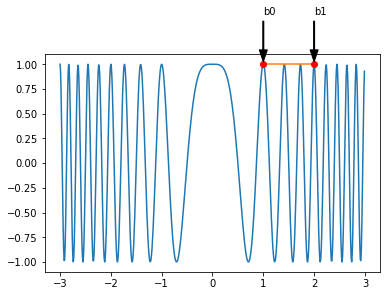

In [17]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from numpy import cos, pi, arange, sin

t = arange(-3.0, 3.0, 0.01)
plt.plot(t, cos(2*pi*t*t))
plt.plot([1, 2], [1,1])
plt.plot([1, 2], [1,1], "ro")

plt.annotate('b0', xy=(1, 1), xytext=(1, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.0, headwidth=8.0),
            )

plt.annotate('b1', xy=(2, 1), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.0, headwidth=8.0),
            )

plt.show()

Para encontrar la velocidad buscamos la razón de cambio máxima, es decir $\max\limits_{t} \frac{\partial s}{ \partial t}$ El Cual se puede ver que se encuentra cerca de $b_1$

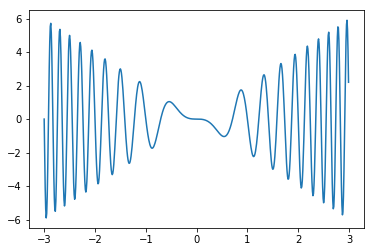

In [11]:
t = arange(-3.0, 3.0, 0.01)
plt.plot(t, -2*t*sin(2*pi*t*t))
plt.show()

Podemos calcular la frecuencia de muestreo para poder graficar. Usando los parametros $a=60\quad b_0 = 10\quad b_1 = 15$ 

Buscamos $\max\limits_{t} \frac{\partial s}{ \partial t}$ para el rango. $ \frac{\partial s}{ \partial t} = -2 \,a\, t \,sin(a \,t^2)$


3352.83876659


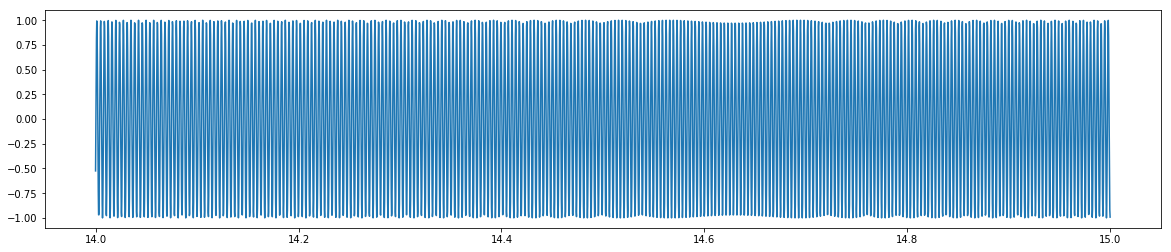

CPU times: user 333 ms, sys: 23.9 ms, total: 357 ms
Wall time: 356 ms


In [3]:
%%time
b0, b1 = 14, 15
a = 60
freq = 2*(-120*14*sin(a*14.5*14.5))
print(freq)
y = [cos(60*x*x) for x in arange(b0, b1, 1.0/freq)]

t = arange(b0, b1, 1.0/freq)
plt.figure(figsize=(20,4))
plt.plot(t, y)
plt.show()

Para una fución de dos variables como $s(x, y) = cos(a(x^2 + y^2))$

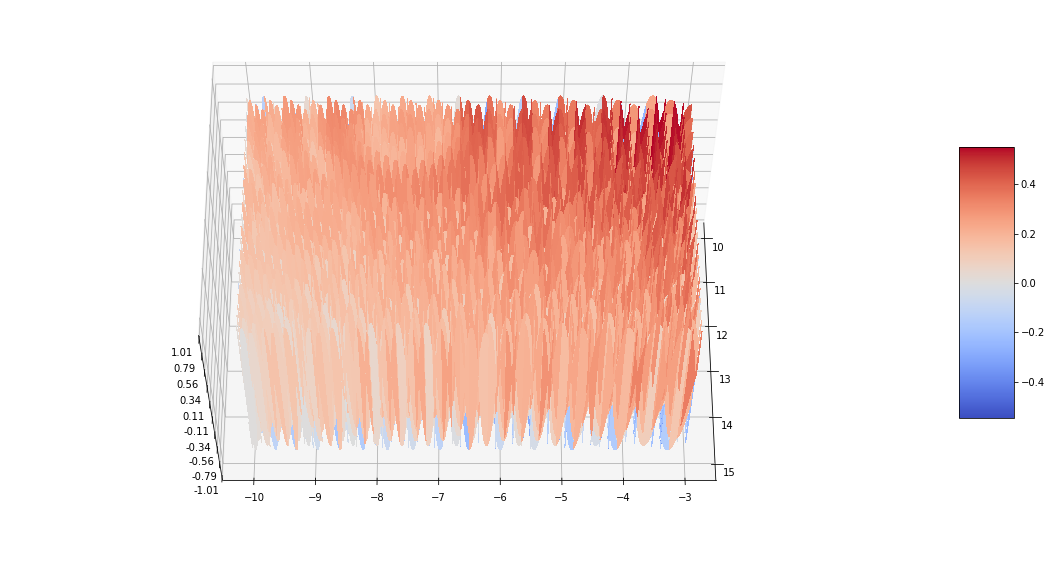

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# plt.figure(figsize=(20,4))
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(10, 15, 0.01)
Y = np.arange(-10, -3, 0.01)
X, Y = np.meshgrid(X, Y)
R = cos((X**2 + Y**2))
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(60, 0)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


Para hacerlo de manera manual, tomamos las derivadas parciales para encontrar las máximas razones de cambio en cada dirección

$$\frac{\partial s}{ \partial x} = -2a\,x\,sin(a(x^2 + y^2)$$
$$\frac{\partial s}{ \partial x} = -2a\,y\,sin(a(x^2 + y^2)$$

En este caso $a = 60 \quad x \in [10, 15] \quad y \in [-10, -3]$

$$\max\limits_{t} \frac{\partial s}{ \partial x} \approx 1800$$
$$\max\limits_{t} \frac{\partial s}{ \partial y} \approx 1200$$

Podemos visualizarlo como una imágen 2D de 2400 x 3600

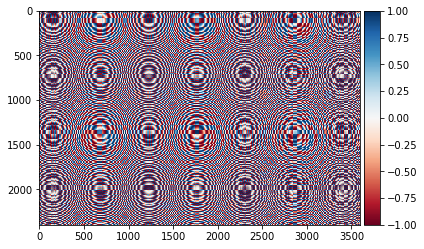

CPU times: user 838 ms, sys: 78.1 ms, total: 916 ms
Wall time: 915 ms


In [23]:
%%time
from numba import jit
from skimage import io

@jit(nopython=True)
def thefunc(a, x, y):
    return cos(a * (x**2 + y**2))

@jit(nopython=True)
def drawImg():
    img = np.zeros((2400, 3600))
    a = 60
    for y in range(img.shape[0]) :
        for x in range(img.shape[1]) :
            img[y, x] = thefunc(a, 10 + 5.0*x/2400.0, -10 + 7.0*y/3600.0)
    return img

io.imshow(drawImg())
io.show()

Se puede hacer lo mismo para una función polinomial

$$ S(x, y) = \sum_{k=0}^{18} a_kx^k + \sum_{k=0}^{10} b_ky^k \quad a_k, b_k \sim unif(0,7) \quad x \in [0, 1] \,\,\,\, y \in [-1,1]$$

Primera derivada

$$ \frac{\partial S(x, y)}{\partial x} = \sum_{k=1}^{18} k\,a_kx^{k-1} \qquad \frac{\partial S(x, y)}{\partial y} = \sum_{k=1}^{10} k\,b_ky^{k-1}$$

Podemos ver que como $x$ siempre es positivo,  $y$ siempre negativo y $a_k$, $b_k$ siempre positivos. El máximo de $\frac{\partial S(x, y)}{\partial x}$ será en x = 1 y para $\frac{\partial S(x, y)}{\partial y}$ se encontrará en los extremos.

(2247, 4642)


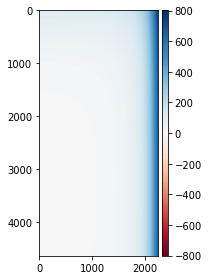

CPU times: user 1.92 s, sys: 136 ms, total: 2.06 s
Wall time: 2.07 s


In [9]:
%%time
a = np.random.uniform(0,7,19)
b = np.random.uniform(0,7,11)
@jit(nopython=True)
def maxFq(a, b, x, y1, y2):
    sx, sy = 0, 0
    for i in range(1, a.shape[0]):
        sx += i*a[i]*x**(i-1)
    for i in range(1, b.shape[0]):
        sy += i*a[i]*y1**(i-1)
    sy1 = 0
    for i in range(1, b.shape[0]):
        sy1 += i*a[i]*y2**(i-1)
    if sy1 > sy : 
        sy = sy1
    return (int(np.ceil(sx)), int(np.ceil(sy)))

sx, sy = maxFq(a, b, 1, -1, 1)
@jit(nopython=True)
def nfunc (x, y, a, b):
    z = 0
    for i in range(a.shape[0]):
        z += i*a[i]*x**(i)
    for i in range(b.shape[0]):
        z+= i*b[i]*y**(i)
    return z

@jit(nopython=True)
def drawImg2(sx, sy):
    img = np.zeros((sy, sx))
    for y in range(img.shape[0]) :
        for x in range(img.shape[1]) :
            img[y, x] = nfunc(x/float(sx), -1 + y/float(sy), a, b)
    return img

s = maxFq(a, b, 1.1, 0, 1.5)
print(s)
io.imshow(drawImg2(*s))
io.show()
